# Import required library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Import the required datas

In [2]:
#import zipfile
#zip_file = zipfile.ZipFile('retail-data-analytics.zip', 'r')
#zip_file.namelist()

In [5]:
# our datas are in datas folder in same directory so 

In [3]:
df = pd.read_csv("datas/Features_data_set.csv")
sales =  pd.read_csv("datas/sales_data_set.csv")
stores = pd.read_csv("datas/stores_data_set.csv")

In [3]:
#check the types of Column format
df.info()      # We can see Date is in object format
sales.info()  # We can see Date is in object format
stores.info()   # We can see Date is in object format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
Store           8190 non-null int64
Date            8190 non-null object
Temperature     8190 non-null float64
Fuel_Price      8190 non-null float64
MarkDown1       4032 non-null float64
MarkDown2       2921 non-null float64
MarkDown3       3613 non-null float64
MarkDown4       3464 non-null float64
MarkDown5       4050 non-null float64
CPI             7605 non-null float64
Unemployment    7605 non-null float64
IsHoliday       8190 non-null bool
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+

### Change the date column format into match date format

In [4]:
df["Date"] = pd.to_datetime(df["Date"])
sales["Date"]  =  pd.to_datetime(sales["Date"])
#stores["Date"] =  pd.to_datetime(stores["Date"])

In [5]:
df.Date.head()  #We can see the dtype is datetime64[ns]

0   2010-05-02
1   2010-12-02
2   2010-02-19
3   2010-02-26
4   2010-05-03
Name: Date, dtype: datetime64[ns]

### Check the datas shape 

In [6]:
print(df.shape, sales.shape, stores.shape)

(8190, 12) (421570, 5) (45, 3)


In [7]:
print(sales[0:4].Date,'\n\n\n' ,sales[-3:].Date)

0   2010-05-02
1   2010-12-02
2   2010-02-19
3   2010-02-26
Name: Date, dtype: datetime64[ns] 


 421567   2012-12-10
421568   2012-10-19
421569   2012-10-26
Name: Date, dtype: datetime64[ns]


## Merge the data into Unique DataFrame

In [8]:
sales.columns,"*-"*50 , df.columns

(Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object'),
 '*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-',
 Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
        'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
        'IsHoliday'],
       dtype='object'))

In [9]:
# We are merging same column head, we know the data sizes are different in various columns

###  while runnning the below code you must be care full and run only once beceause the datas will be over copied

In [10]:
df_ = pd.merge(sales,df,on = ["Store","Date", "IsHoliday"], how="left")
df_ = pd.merge(df_, stores, on= ["Store"],how = "left")
df = df_ #df is no more use

df.shape

(421570, 16)

In [11]:
# the above will only added some columns only 

In [12]:
df.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

###  We can see that MarkDown1, 2 , 3, 4, 5 columns have na value to much , so we have to manage them separately

In [13]:
df= df.fillna(0)
df["Temperature"] = (df["Temperature"]-32)*5./9. # fer cen
types_encoded , types = df["Type"].factorize()
df["Type"] = types_encoded # #types_encoded is numerical values and types is original
#df.head()
"""
labels, uniques = pd.factorize(['b', 'b', 'a', 'c', 'b'])
>>> labels
array([0, 0, 1, 2, 0])
>>> uniques
array(['b', 'a', 'c'], dtype=object)
"""


"\nlabels, uniques = pd.factorize(['b', 'b', 'a', 'c', 'b'])\n>>> labels\narray([0, 0, 1, 2, 0])\n>>> uniques\narray(['b', 'a', 'c'], dtype=object)\n"

In [14]:
df.isna().sum() # We can see there is no na values

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

In [15]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,24924.50,False,5.727778,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315
1,1,1,2010-12-02,46039.49,True,3.616667,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,0,151315
2,1,1,2010-02-19,41595.55,False,4.405556,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,151315
3,1,1,2010-02-26,19403.54,False,8.127778,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,151315
4,1,1,2010-05-03,21827.90,False,8.055556,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,151315


In [16]:
df["Type"].unique()# There are only 3 types 

array([0, 1, 2], dtype=int64)

## Check data and features

In [17]:
print("training_data duplicated:{}".format(df.duplicated().sum()))

training_data duplicated:0


In [18]:
df.shape

(421570, 16)

In [19]:
df.drop_duplicates(inplace = True)
df.shape

(421570, 16)

In [20]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,15.605588,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,0.589912,136727.915739
std,12.785297,30.492054,22711.183519,10.248851,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,0.666337,60980.583328
min,1.000000,1.000000,-4988.940000,-18.922222,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,0.000000,34875.000000
25%,11.000000,18.000000,2079.650000,8.155556,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,0.000000,93638.000000
50%,22.000000,37.000000,7612.030000,16.716667,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,0.000000,140167.000000
75%,33.000000,74.000000,20205.852500,23.488889,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,1.000000,202505.000000
max,45.000000,99.000000,693099.360000,37.855556,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,2.000000,219622.000000


In [21]:
tab_info = pd.DataFrame(df.dtypes).T.rename(index = {0:'column Type'})
tab_info = tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index = {0:"null values(nb)"}))

tab_info = tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.rename(index = {0: "null values (%)"}))
tab_info

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
column Type,int64,int64,datetime64[ns],float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64
null values(nb),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
null values (%),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Gain Some Graphical insight

**Plot** some of the variable present in the data such as ```temperature , fuel price , CPI , unemployment rate ```

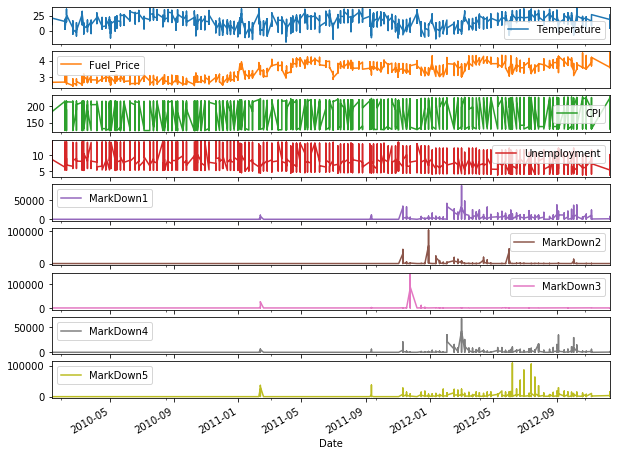

In [22]:
df[["Date","Temperature", "Fuel_Price","CPI", "Unemployment" , 'MarkDown1', "MarkDown2" , "MarkDown3" , "MarkDown4" , "MarkDown5"]].plot(x = "Date",subplots = True, figsize = [10,8])
plt.show()

**Sum the weekly sales from every shop to get the total weekly sales volume  of the retail chain**

<Figure size 432x288 with 0 Axes>

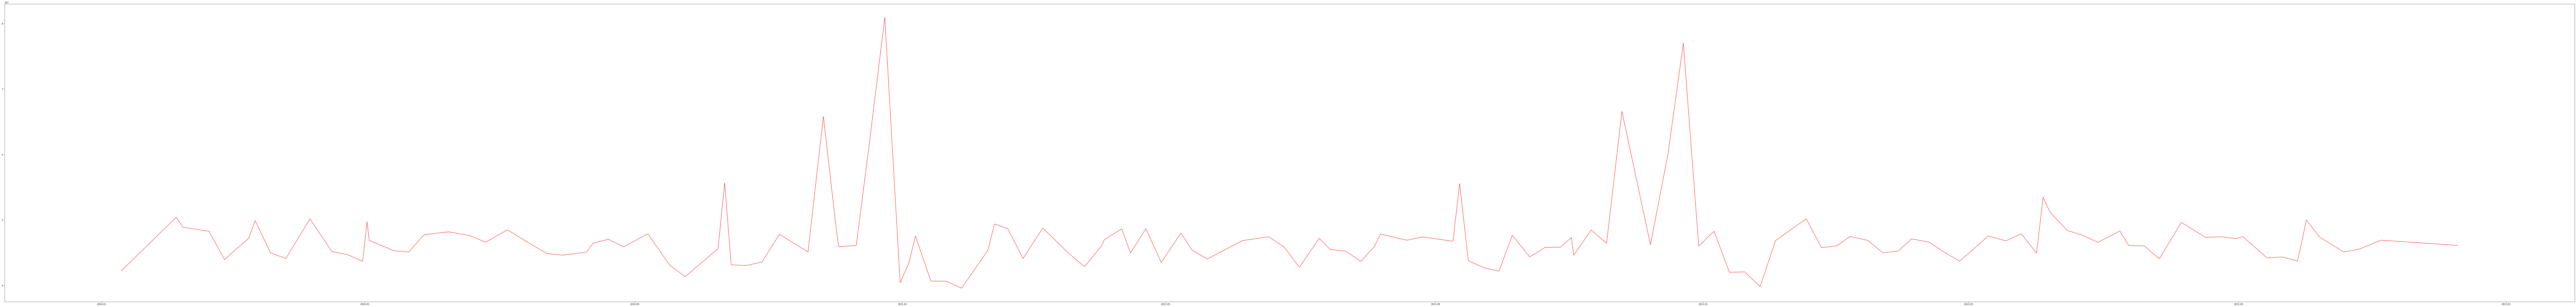

In [23]:
df_average_sales_week = df.groupby(by = ['Date'],as_index=False)["Weekly_Sales"].sum()
df_average_sales = df_average_sales_week.sort_values("Weekly_Sales", ascending = False)

plt.figure(facecolor="gold")
plt.figure(figsize = (210,25))
plt.plot(df_average_sales_week.Date, df_average_sales_week.Weekly_Sales,"r")

plt.show()

## Get More insights

In [24]:
# The more remunerative weeks
df_average_sales.head()
#df_average_sales.max()

,Date,Weekly_Sales
46,2010-12-24,80931415.60
98,2011-12-23,76998241.31
95,2011-11-25,66593605.26
41,2010-11-26,65821003.24
45,2010-12-17,61820799.85


In [25]:
df_average_sales[::3].size   # With the gap of 2

96

In [26]:
df_average_sales.shape

(143, 2)

In [27]:
# The least remunerative weeks

In [28]:
df_average_sales[::-1].head()

,Date,Weekly_Sales
52,2011-01-28,39599852.99
103,2012-01-27,39834974.67
47,2010-12-31,40432519.00
51,2011-01-21,40654648.03
50,2011-01-14,40673678.04


In [29]:
ts = df_average_sales_week.set_index("Date")
#ts = ts.resample("H").ffill()
#ts = ts.resample("W").sum()
ts.head()

,Weekly_Sales
Date,
2010-01-10,42239875.87
2010-02-04,50423831.26
2010-02-07,48917484.50
2010-02-19,48276993.78
2010-02-26,43968571.13


In [30]:
# The least remunerative weeks
df_average_sales [::-1].head()

,Date,Weekly_Sales
52,2011-01-28,39599852.99
103,2012-01-27,39834974.67
47,2010-12-31,40432519.00
51,2011-01-21,40654648.03
50,2011-01-14,40673678.04


In [31]:
# Top performing type of stores in term of sales
df_top_stores = df.groupby(by=["Type"],as_index = False)["Weekly_Sales"].sum()
df_top_stores.sort_values("Weekly_Sales", ascending = False)[:3]

,Type,Weekly_Sales
0,0,4.331015e+09
1,1,2.000701e+09
2,2,4.055035e+08


In [32]:
# Top performing stores in term of sales
df_top_stores = df.groupby(by=["Store"], as_index = False)["Weekly_Sales"].sum()
df_top_stores.sort_values("Weekly_Sales",ascending = False)[:3]

,Store,Weekly_Sales
19,20,3.013978e+08
3,4,2.995440e+08
13,14,2.889999e+08


## Forecast of the total sales volume

In [33]:
from statsmodels.graphiics.tsaplots import acf, pacf , plot_acf , plot_pacf
fig, axes = plt.subplots(1,2,figsize= (20,5))
plot_acf(ts, lags = 100 , ax = axes[0])
plot_pacf(ts,lags=100, ax=axes[1])
plt.show()

ModuleNotFoundError: No module named 'statsmodels.graphiics'

## Model definition


In [34]:
from sklearn.linear_model import LinearRegression

def fit_ar_model(ts,orders):
    x= np.array([ts.values[(i-orders)].squeeze() if i>=np.max(orders) else np.array(len(orders)*[np.nan]) for i in range(len(ts))])
    mask = ~np.isnan(x[:,:1]).squeeze()
    y = ts.values
    lin_reg = LinearRegression()
    lin_reg.fit(x[mask],y[mask])
    print(lin_reg.coef_ , lin_reg.intercept_)
    print("Score factor :%.2f"%lin_reg.score(x[mask],y[mask]))
    
    return lin_reg.coef_, lin_reg.intercept_

def predict_ar_model(ts, orders, coef, intercept):
    return np.array([np.sum(np.dot(coef, ts.values[(i-orders)].squeeze())) + intercept  if i >= np.max(orders) else np.nan for i in range(len(ts))])

#### Given Seasonality observed from the ACF and the PACF function , the AR model is implemented including seasonality from weeks(1,6,52)

[[ 0.13488444 -0.06693086  0.53027452]] [19022705.5641859]
Score factor :0.41


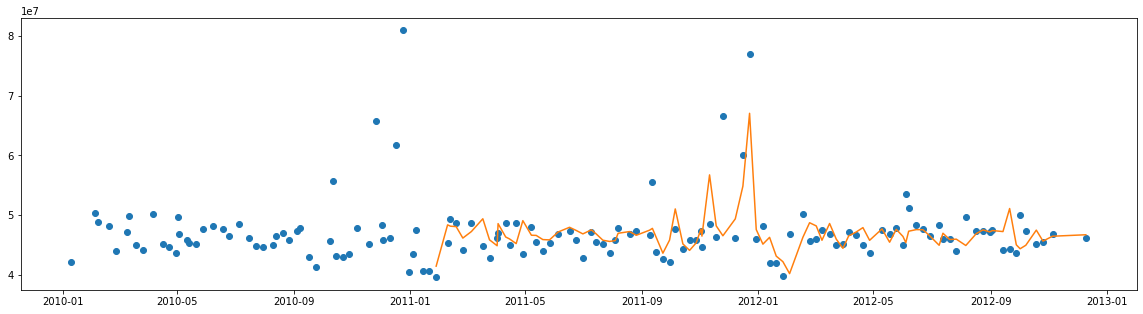

In [36]:
import numpy as np
orders = np.array([1,6,52])
coef , intercept = fit_ar_model(ts,orders)
pred = pd.DataFrame(index = ts.index , data = predict_ar_model(ts,orders, coef , intercept))
plt.figure(figsize=(20,5))
plt.plot(ts,"o")
plt.plot(pred)
plt.show()

AR Residuals : avg-0.00, std 0.07


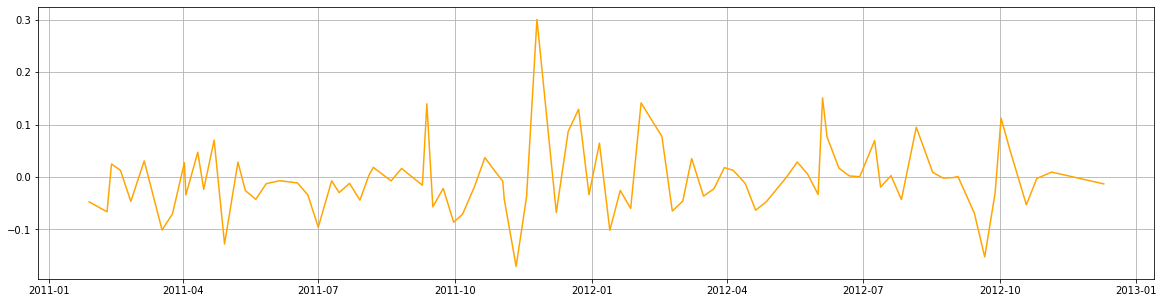

In [37]:
diff  = (ts["Weekly_Sales"]-pred[0])/ts["Weekly_Sales"]
print("AR Residuals : avg%.2f, std %.2f" %(diff.mean(), diff.std()))
plt.figure(figsize = (20,5))
plt.plot(diff, c = "orange")
plt.grid()
plt.show()

## Forecast the store-wise sales volume

In [39]:
df20 = df.where(df["Store"]==20)
df20 = df20.dropna()
df20 = df20.groupby(by = ["Date"], as_index = False)["Weekly_Sales"].sum()
df20 = df20.set_index("Date")
df20.head()

,Weekly_Sales
Date,
2010-01-10,1933719.21
2010-02-04,2405395.22
2010-02-07,2143676.77
2010-02-19,2161549.76
2010-02-26,1898193.95


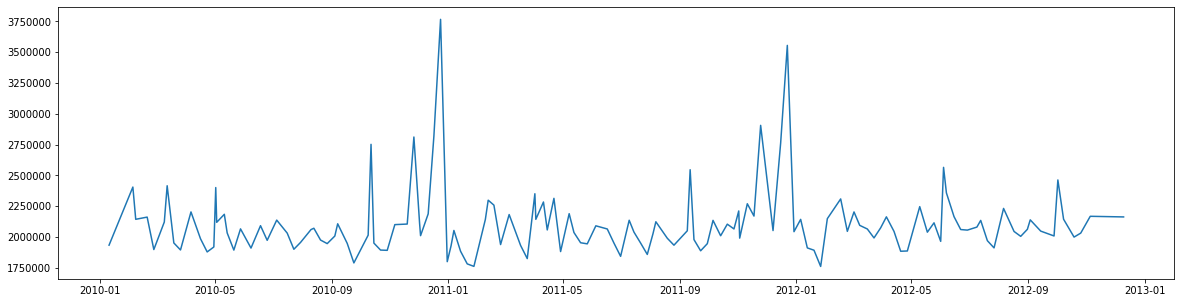

In [41]:
plt.figure(figsize = (20,5))
plt.plot(df20.index , df20.values)
plt.show()

NameError: name 'plot_acf' is not defined

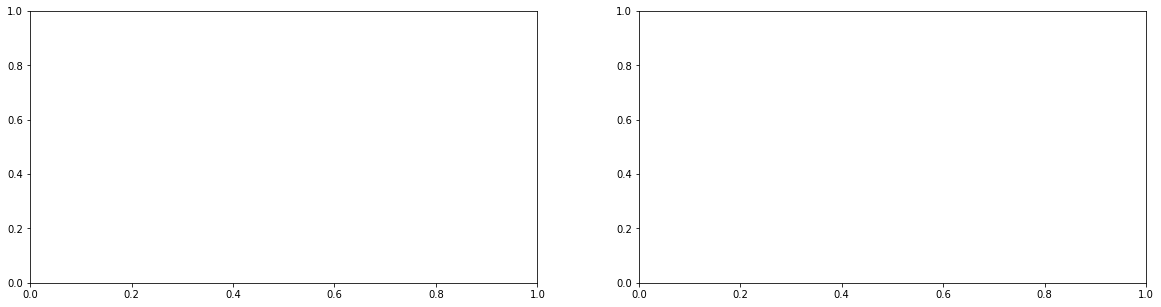

In [42]:
fig, axes = plt.subplots(1,2,figsize = (20,5))
plot_acf(df20.values, lags = 100, alpha = 0.05, ax = axes[0])   #from stat model
plot_pacf(df20.values, lags = 100 , alpha = 0.5 , ax = axes[1])  #From stat model
plt.show()